In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')

In [54]:
import os 
os.chdir('C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression')
os.getcwd()

'C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression'

In [55]:
dataset = pd.read_csv('Position_Salaries.csv')

In [56]:
##################### Missing values ############################

dataset.columns
X= dataset.iloc[:,1:2].values
Y= dataset.iloc[:,len(dataset.columns)-1].values

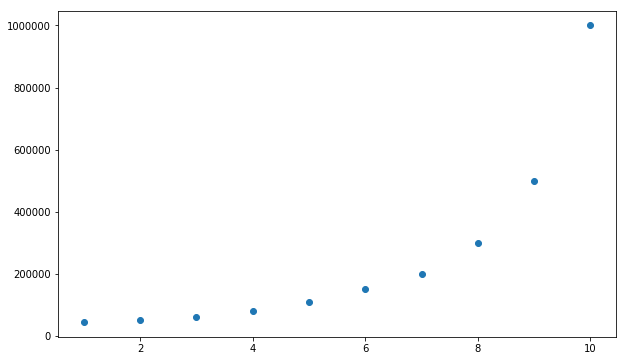

In [57]:
###############3 Lets look at the graph to decide whether to use Linear or Polynomial Graph #############
plt.scatter(X,Y)
plt.show()
### The graph looks similar to polynomial features 
### So we would do both linear and polynomial and test the result on both

In [58]:
###### Missing values ##############################
#### No Missing values ######################################
dataset[dataset['Position'].isna()]
dataset[dataset['Level'].isna()]
dataset[dataset['Salary'].isna()]

,Position,Level,Salary


In [59]:
###########  To Plot Level Vs Salary
### No Categorical variables so we can skip this part ##############################
###### Dataset is Low and we need actual prediction so we can skip the train and test set in this case ##################3
#### Feature scaling not required for 1 vs 1 variable ################################

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [122]:
regressor = PolynomialFeatures(degree=3)
X_poly=regressor.fit_transform(X)
regressor.fit(X_poly,Y)
linear_regressor = LinearRegression()
linear_regressor.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

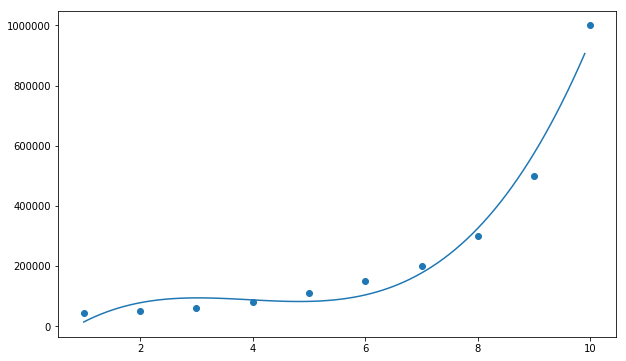

In [123]:

X_grid =np.arange(min(X),max(X),0.1)
X_grid = np.reshape(X_grid,(len(X_grid),1))
plt.scatter(x=X,y=Y)
plt.plot(X_grid,linear_regressor.predict(regressor.fit_transform(X_grid)))
plt.show()

In [130]:
import statsmodels.formula.api as sm
sm.OLS(linear_regressor.predict(regressor.fit_transform(X_grid)),X_grid).fit().pvalues.astype('float')
######## P- value is very very low so the model is better than Linear Model output mentioned below ###########3333

array([  5.91559117e-31])

In [127]:
############## check P Value for Linear Model #############################
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X,Y)
import statsmodels.formula.api as sm
sm.OLS(Y,X).fit().pvalues

array([ 0.00050676])